# HW2
## Casey McGinley
### Due: 10/11/2016
This Jupyter NB constitutes my submission for HW 2. The first few cells are from the original notebook provided by the professor. My code/answers for the two linear regression problems are clearly marked after the exploration and correlation sections.

# Exploring the housing dataset

Before we implement our first linear regression model, we will introduce a new dataset, the Housing Dataset, which contains information about houses in the suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. The Housing Dataset has been made freely available and can be downloaded from the UCI machine learning repository at https://archive.ics.uci.edu/ml/datasets/Housing.



The features of the 506 samples may be summarized as shown in the excerpt of the dataset description:

    CRIM: This is the per capita crime rate by town
    ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
    INDUS: This is the proportion of non-retail business acres per town
    CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
    NOX: This is the nitric oxides concentration (parts per 10 million)
    RM: This is the average number of rooms per dwelling
    AGE: This is the proportion of owner-occupied units built prior to 1940
    DIS: This is the weighted distances to five Boston employment centers
    RAD: This is the index of accessibility to radial highways
    TAX: This is the full-value property-tax rate per 10,000
    PTRATIO: This is the pupil-teacher ratio by town
    B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
    LSTAT: This is the percentage lower status of the population
    MEDV: This is the median value of owner-occupied homes in $1000s

For the rest of the exercise we will regard the housing prices **(MEDV)** as our target variable—the variable that we want to predict using one or more of the 13 explanatory variables. Before we explore this dataset further, lets fetch it from the UCI repository into a pandas DataFrame:

In [187]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizing the important characteristics of a dataset

Exploratory Data Analysis (EDA) is an important and recommended first step prior to the training of a machine learning model. In the rest of this section, we will use some simple yet useful techniques from the graphical EDA toolbox that may help us to visually detect the presence of outliers, the distribution of the data, and the relationships between features.

## Scatterplot matrix

First, we will create a scatterplot matrix that allows us to visualize the pair-wise correlations between the different features in this dataset in one place. To plot the scatterplot matrix, we will use the pairplot function from the seaborn library (http://stanford.edu/~mwaskom/software/seaborn/), which is a Python library for drawing statistical plots based on matplotlib:

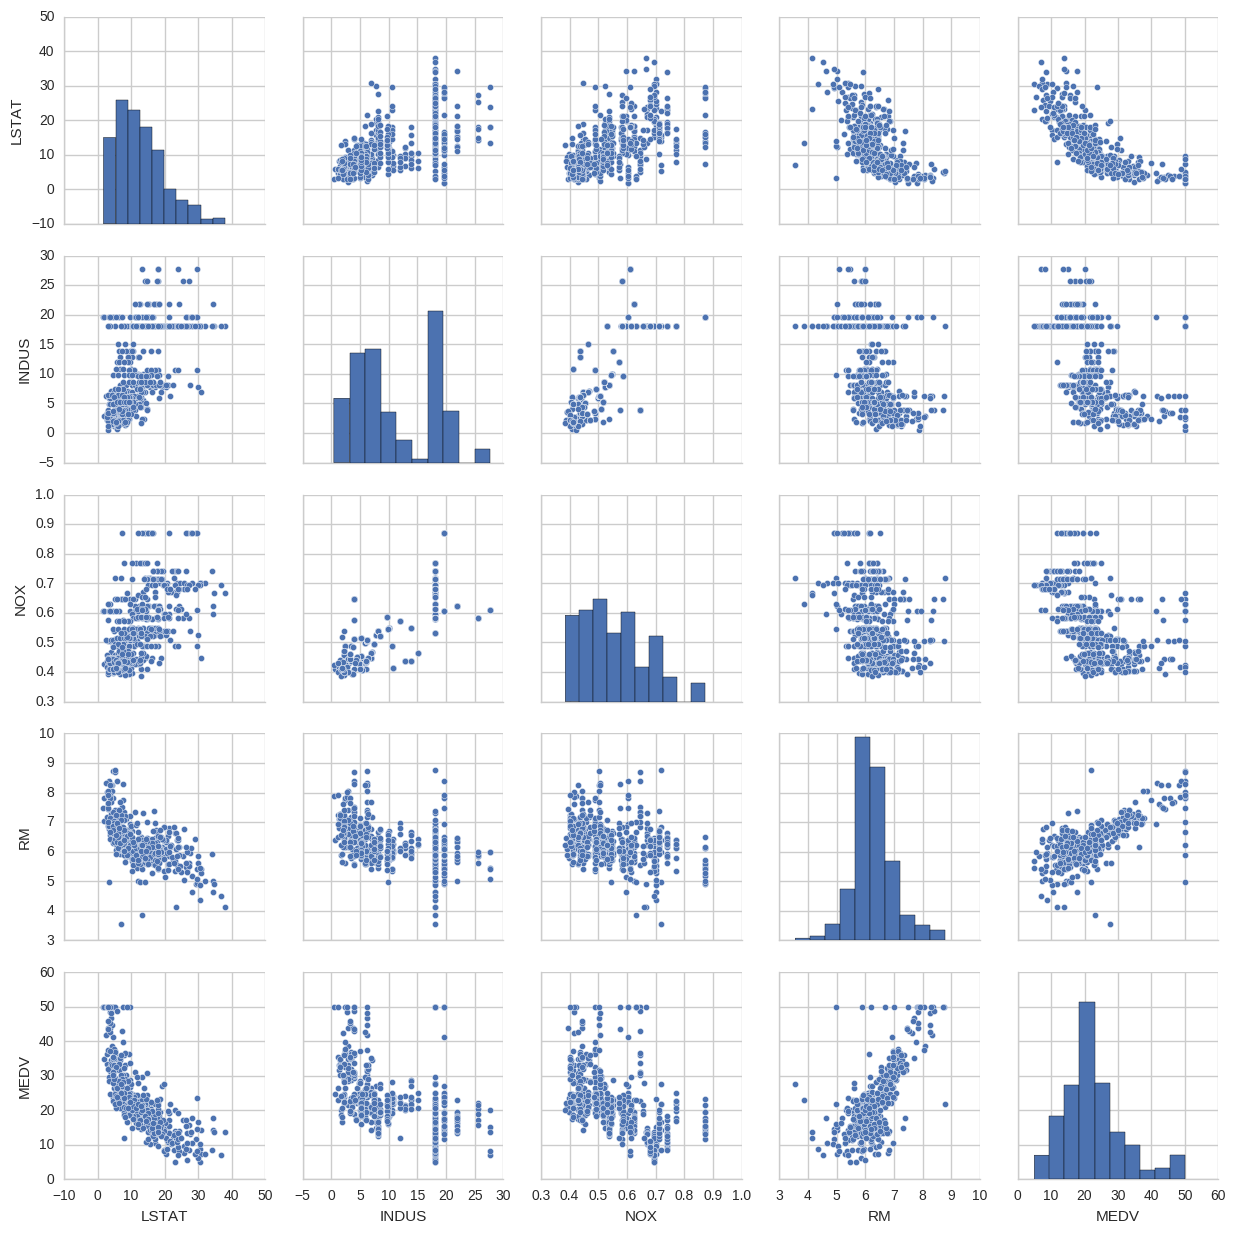

In [188]:
# Note you won't have seaborn with anaconda. 
# Install it using:
# >> pip install seaborn

%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5);
plt.show()



As we can see in the figure, the scatterplot matrix provides us with a useful graphical summary of the relationships in a dataset. 

Using this scatterplot matrix, we can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between **RM** and the housing prices **MEDV** (the fifth column of the fourth row). 

Furthermore, we can see in the histogram (the lower right subplot in the scatter plot matrix) that the **MEDV** variable seems to be normally distributed but contains several outliers.

## Correlation Matrix

The correlation matrix is a square matrix that contains the Pearson  coefficients (often abbreviated as Pearson's r), which measure the linear dependence between pairs of features. 

The correlation coefficients are bounded to the range -1 and 1. 
Two features have:
- a perfect positive correlation if r =1 
- No correlation if r=0 and 
- a perfect negative correlation if r= -1 

Visualizing the important characteristics of a dataset, respectively. As mentioned previously, Pearson's correlation coefficient can simply be calculated as the covariance between two features Visualizing the important characteristics of a dataset and Visualizing the important characteristics of a dataset (numerator) divided by the product of their standard deviations (denominator). 

### Aside Correlation vs Regression

Correlation and Regression are the two analysis based on multivariate distribution. A multivariate distribution is described as a distribution of multiple variables. Correlation is described as the analysis which lets us know the association or the absence of the relationship between two variables ‘x’ and ‘y’. On the other end, Regression analysis, predicts the value of the dependent variable based on the known value of the independent variable, assuming that average mathematical relationship between two or more variables.

Read more: http://keydifferences.com/difference-between-correlation-and-regression.html#ixzz4M8UacH4D

In the following code example, we will use NumPy's corrcoef function on the five feature columns that we previously visualized in the scatterplot matrix, and we will use seaborn's heatmap function to plot the correlation matrix array as a heat map:


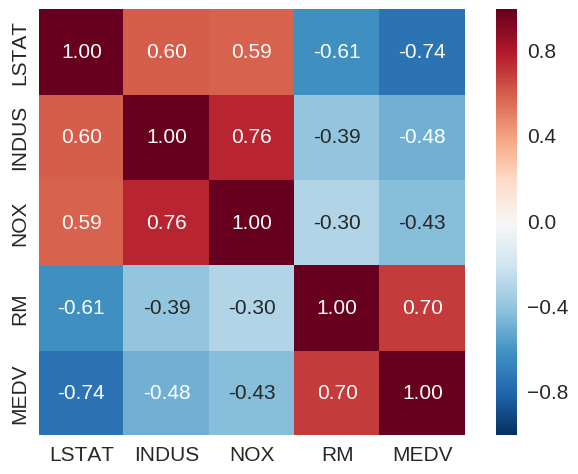

In [189]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)
plt.show()

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable **MEDV**. Looking at the preceding correlation matrix, we see that our target variable MEDV shows the largest correlation with the **LSTAT** variable (-0.74). However, as you might remember from the scatterplot matrix, there is a clear nonlinear relationship between LSTAT and MEDV. 

On the other hand, the correlation between **RM** and **MEDV** is also relatively high (0.70) and given the linear relationship between those two variables that we observed in the scatterplot, RM seems to be a good choice for an exploratory variable to look at a simple linear regression model. 



# HW 2
## Casey McGinley

### Problem 1 - Simple Linear Regression
#### Part A
The features most correlated with our target variable MEDV would be **LSTAT and RM**, in that order. LSTAT is highly negatively correlated with the target with a **Pearson coefficient of -0.74**, and RM is highli positively correlated with a **Pearson coefficient of 0.70**.

Ranking all four other features in terms of correlation with the target would yield the following order: LSTAT (-0.74), RM (0.70), INDUS (-0.48), NOX (-0.43)

#### Part B
We split the data into training and test subsets using the scikit-learn module. By default, the train_test_split() function gives us about a 75-25 split on training vs. test data, respectively. See the cell below:

In [190]:
from sklearn import model_selection

train,test = model_selection.train_test_split(df)
print("Train dataset size: {0} ({1:2.2f}%)".format(len(train),float(len(train))/float(len(df))*100))
print("Test dataset size: {0} ({1:2.2f}%)".format(len(test),float(len(test))/float(len(df))*100))

Train dataset size: 379 (74.90%)
Test dataset size: 127 (25.10%)


#### Part C
We will now build a regression model. RM is our predictor variable and MEDV remains our target. We fit our model on the training dataset, using RM as the X value and MEDV as the Y value. After fitting, we print out the predictions on the test data alongside the real target value

In [191]:
from sklearn import linear_model

# create model
reg_model = linear_model.LinearRegression()

# isolate the columns we care about
train_X = train[['RM']]
train_y = train[['MEDV']]
test_X = test[['RM']]
test_y = test[['MEDV']]

# fit the model
reg_model.fit(train_X,train_y)

# predict on test data
predictions = reg_model.predict(test_X)

# show results compared to target
print("Prediction  |  Target")
for i in range(len(predictions)):
    print("    {0:6.3f}  |  {1:6}".format(predictions[i][0],test_y['MEDV'].data[i]))

Prediction  |  Target
    19.661  |     8.8
    23.427  |    15.0
    28.726  |    10.4
    24.162  |    11.8
    26.951  |    26.6
    21.319  |    15.2
    19.392  |    19.6
    26.574  |    14.9
    16.495  |    26.4
    27.220  |    31.1
    40.365  |    44.8
    33.084  |    44.0
    44.292  |    50.0
    15.141  |     5.0
    27.767  |    28.5
    22.010  |    18.4
    20.817  |    24.0
    21.795  |    21.7
    18.925  |    17.4
    20.898  |    20.1
    21.983  |    50.0
    21.678  |    25.0
    21.337  |    36.2
    17.473  |    12.7
    23.453  |     9.5
    20.181  |    22.5
    20.315  |    16.6
    21.777  |    13.8
    19.383  |    19.1
    18.558  |    19.9
    30.331  |    36.2
    16.701  |    12.8
    21.400  |    17.8
    16.397  |    17.6
    20.503  |    23.2
    18.943  |    23.8
    21.140  |    21.5
    27.166  |    13.3
    28.726  |    35.4
    21.050  |    22.6
    16.477  |    19.4
    14.693  |    13.4
    16.432  |    15.4
    17.195  |    19.3
    18.925

#### Part D
We print out slope and intercept, and we calculate the training set score, as well as the Mean Squared Error for training and test predictions.

In [192]:
import numpy as np

# print slope and intercept
print("Slope: {0}".format(reg_model.coef_[0][0]))
print("Intercept: {0}".format(reg_model.intercept_[0]))

# calculate the training set score
print("Training Set Score: {0}".format(reg_model.score(train_X,train_y)))

# calculate the mean square error
mean_sq_err_train = np.mean((reg_model.predict(train_X) - train_y) ** 2)
mean_sq_err_test = np.mean((reg_model.predict(test_X) - test_y) ** 2)
print("Mean square error train: {0}".format(mean_sq_err_train[0]))
print("Mean square error test: {0}".format(mean_sq_err_test[0]))

Slope: 8.966852611650783
Intercept: -33.75501977929336
Training Set Score: 0.5025864492769189
Mean square error train: 41.86426662755863
Mean square error test: 48.83510315574348


#### Part E
We plot all of the data points in a scatter plot, and trace the regression line using the predict() function

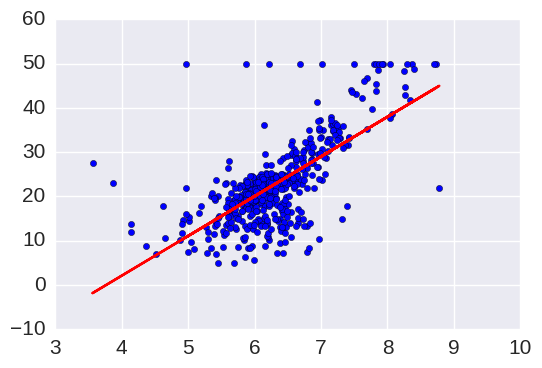

In [193]:
%matplotlib inline 

import matplotlib.pyplot as plt

all_data_X = df[['RM']]
all_data_y = df[['MEDV']]

# setup scater plot
plt.scatter(all_data_X,all_data_y)

# plot regression line
plt.plot(all_data_X,reg_model.predict(all_data_X),color='red')

plt.show()

### Problem 2 - Add more features to your model
We expand upon Problem 1 by adding more predictive features

#### Part A
We now use LSTAT in addition to RM as a predictor variable
##### Sub-part a)
We use the data we split earlier for train and test, this time including the LSTAT feature

In [194]:
# establish predictors and target
predictors = ['RM','LSTAT']
target = ['MEDV']

# get columns we need
train_2A_X = train[predictors]
train_2A_y = train[target]
test_2A_X = test[predictors]
test_2A_y = test[target]

##### Sub-part b)
We build our regression model as before:

In [195]:
# build, fit, predict
model_2A = linear_model.LinearRegression()
model_2A.fit(train_2A_X,train_2A_y)
predictions = model_2A.predict(test_2A_X)

##### Sub-part c)
We print/compute the slope, intercept, training set score, and the mean squared errors:

In [196]:
# print out slope, intercept, etc.
print("Slope: {0}".format(model_2A.coef_[0][0]))
print("Intercept: {0}".format(model_2A.intercept_[0]))
print("Training Set Score: {0}".format(model_2A.score(train_2A_X,train_2A_y)))
mean_sq_err_train_2A = np.mean((model_2A.predict(train_2A_X) - train_2A_y) ** 2)
mean_sq_err_test_2A = np.mean((model_2A.predict(test_2A_X) - test_2A_y) ** 2)
print("Mean square error train: {0}".format(mean_sq_err_train_2A[0]))
print("Mean square error test: {0}".format(mean_sq_err_test_2A[0]))

Slope: 5.100310258280706
Intercept: -1.8405916600614347
Training Set Score: 0.6476770750446026
Mean square error train: 29.652873042748144
Mean square error test: 33.34579321655279


#### Part B
We repeat all of Part A, this time adding INDUS as a predictor as well:

In [197]:
# same idea as previous blocks, now with INDUS
predictors = ['RM','LSTAT','INDUS']
target = ['MEDV']
train_2B_X = train[predictors]
train_2B_y = train[target]
test_2B_X = test[predictors]
test_2B_y = test[target]

model_2B = linear_model.LinearRegression()
model_2B.fit(train_2B_X,train_2B_y)
predictions = model_2B.predict(test_2B_X)

print("Slope: {0}".format(model_2B.coef_[0][0]))
print("Intercept: {0}".format(model_2B.intercept_[0]))
print("Training Set Score: {0}".format(model_2B.score(train_2B_X,train_2B_y)))
mean_sq_err_train_2B = np.mean((model_2B.predict(train_2B_X) - train_2B_y) ** 2)
mean_sq_err_test_2B = np.mean((model_2B.predict(test_2B_X) - test_2B_y) ** 2)
print("Mean square error train: {0}".format(mean_sq_err_train_2B[0]))
print("Mean square error test: {0}".format(mean_sq_err_test_2B[0]))

Slope: 5.0404962715591966
Intercept: -0.9597633038202211
Training Set Score: 0.6530621705249395
Mean square error train: 29.19964238050349
Mean square error test: 34.6453127436845


#### Part C
We repeat part A again, adding NOX as a predictor:

In [198]:
# same idea as previous blocks, now with NOX
predictors = ['RM','LSTAT','INDUS','NOX']
target = ['MEDV']
train_2C_X = train[predictors]
train_2C_y = train[target]
test_2C_X = test[predictors]
test_2C_y = test[target]

model_2C = linear_model.LinearRegression()
model_2C.fit(train_2C_X,train_2C_y)
predictions = model_2C.predict(test_2C_X)

print("Slope: {0}".format(model_2C.coef_[0][0]))
print("Intercept: {0}".format(model_2C.intercept_[0]))
print("Training Set Score: {0}".format(model_2C.score(train_2C_X,train_2C_y)))
mean_sq_err_train_2C = np.mean((model_2C.predict(train_2C_X) - train_2C_y) ** 2)
mean_sq_err_test_2C = np.mean((model_2C.predict(test_2C_X) - test_2C_y) ** 2)
print("Mean square error train: {0}".format(mean_sq_err_train_2C[0]))
print("Mean square error test: {0}".format(mean_sq_err_test_2C[0]))

Slope: 5.058026731582925
Intercept: -0.5673073211842237
Training Set Score: 0.6531644397824599
Mean square error train: 29.191035000470496
Mean square error test: 34.75763797877229


#### Part D
We repeat the process again, this time using all the possible predictor variables:

In [199]:
# same idea, now with all features
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
target = ['MEDV']
train_2D_X = train[predictors]
train_2D_y = train[target]
test_2D_X = test[predictors]
test_2D_y = test[target]

model_2D = linear_model.LinearRegression()
model_2D.fit(train_2D_X,train_2D_y)
predictions = model_2D.predict(test_2D_X)

print("Slope: {0}".format(model_2D.coef_[0][0]))
print("Intercept: {0}".format(model_2D.intercept_[0]))
print("Training Set Score: {0}".format(model_2D.score(train_2D_X,train_2D_y)))
mean_sq_err_train_2D = np.mean((model_2D.predict(train_2D_X) - train_2D_y) ** 2)
mean_sq_err_test_2D = np.mean((model_2D.predict(test_2D_X) - test_2D_y) ** 2)
print("Mean square error train: {0}".format(mean_sq_err_train_2D[0]))
print("Mean square error test: {0}".format(mean_sq_err_test_2D[0]))

Slope: -0.06634590354948196
Intercept: 38.26881330110136
Training Set Score: 0.754369817970876
Mean square error train: 20.673195206070698
Mean square error test: 27.51490912723103


#### Part E
We now graph the MSEs from parts A, B, C and D to observe how degree of fit (e.g. the number of predictive features) played into the observed mean squared error

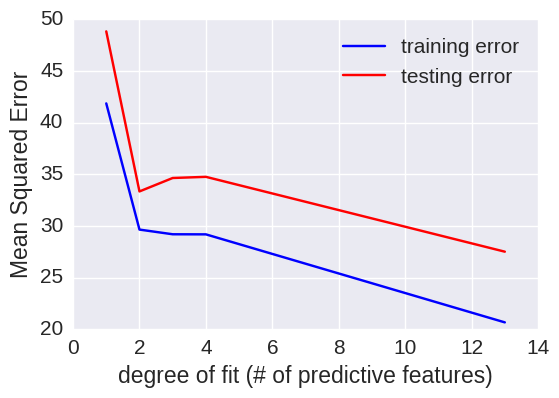

In [200]:
# the x-axis will be degree of fit, or the number of predictive features
msqerr_X = [1,2,3,4,13]

# the y-axis will be the MSE
msqerr_y_train = [mean_sq_err_train,mean_sq_err_train_2A,mean_sq_err_train_2B,mean_sq_err_train_2C,mean_sq_err_train_2D]
msqerr_y_test = [mean_sq_err_test,mean_sq_err_test_2A,mean_sq_err_test_2B,mean_sq_err_test_2C,mean_sq_err_test_2D]

# plot training data
plt.plot(msqerr_X,msqerr_y_train,color='blue',label='training error')
# plot testing data
plt.plot(msqerr_X,msqerr_y_test,color='red',label='testing error')
#setup legend
plt.legend(loc='upper right')
# label the axes
plt.xlabel("degree of fit (# of predictive features)")
plt.ylabel("Mean Squared Error")
plt.show()

Both errors exhibit a downward trend in error as the degree of fit increases. The most drastic change in error (most notably for the training line) occurs when the degree of fit goes to 2, which was when LSTAT was added to RM as predictive features. The addition of a 3rd and 4th predictive feature had little effect on the errors observed, but decreasing trend was preserved for both the training and testing errors. The MSEs decreased more drastically once all of the other features were used as predictive on MEDV. The fact that the errors went down as features were added indicates that the model had high bias initially and was underfitted on the data. This grew significantly better as more features were added, but the trend in error would seems like it could continue downward further as the lines are not converging on a specific limit/value. Since there are no more features to add, it is unclear to me what could be done at this point to decrease bias and achieve a more balanced fit on the data.